# TEST

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import random
import torchvision
import copy
from torchvision import datasets

/home/will/miniconda3/envs/pycourse/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/will/miniconda3/envs/pycourse/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## k-means: MNIST, k = 10

### Step 1: Preprocessing

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=False, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=False, transform=None)

In [3]:
N = 60000
tensor_data = mnist_trainset.data.numpy()
x = np.ndarray((N, 784))
for i in range(N):
    x[i] = np.ndarray.flatten(tensor_data[i])

### Step 2: Initialization

In [4]:
k = 10

#initialize gamma and m vectors
ms = np.ndarray((k, 784))
for i in range(k):
    index = random.randint(0, N - 1)
    ms[i] = x[index]

gammas = np.zeros(N, dtype=int)
for i in range(N):
        min_index = -1
        min_dist = np.Inf
        for j in range(k):
            dist_norm = np.linalg.norm(x[i] - ms[j])
            if dist_norm < min_dist:
                min_dist = dist_norm
                gammas[i] = j



### Step 3: The algorithm

In [5]:
Js = []
while True:

    #Calculate Clusters C and distortion J
    C = []
    for i in range(k):
        C_i = []
        C.append(C_i)

    for i in range(N):
        g = gammas[i]
        C[g].append(x[i])

    for j in range(k):
        len_Cj = len(C[j])
        ms[j] = (1/len_Cj)
        sum = 0
        for i in range(len_Cj):
            sum = sum + C[j][i]
        ms[j] = ms[j]*sum

        #update gammas then m
    for i in range(N):
        min_index = -1
        min_dist = np.Inf
        for j in range(k):
            dist_norm = np.linalg.norm(x[i] - ms[j])
            if dist_norm < min_dist:
                min_dist = dist_norm
                gammas[i] = j
        
    J = 0.0
    for i in range(N):
        g = gammas[i]
        d = np.linalg.norm(x[i] - ms[g])**2
        J = J + d
    
    if len(Js) > 0 and np.linalg.norm(J - Js[-1]) < 1:
        Js.append(J)
        break
    Js.append(J)
    






### Step 4: Plot decreasing distortion

Text(0, 0.5, '$J_{avg^2}$ Distortion')

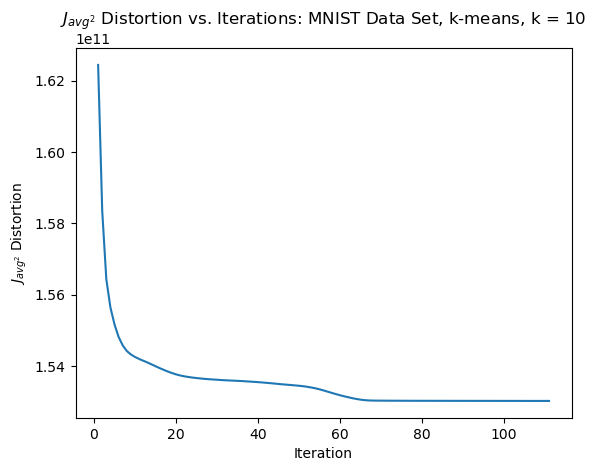

In [6]:
num_iter = len(Js)
Ts = np.arange(num_iter) + 1
fig, ax = plt.subplots()
ax.plot(Ts, Js)
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: MNIST Data Set, k-means, k = 10")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

## k-means: MNIST, k = 16

### Step 1: Initialization

In [7]:
k = 16

#initialize gamma and m vectors
ms = np.ndarray((k, 784))
for i in range(k):
    index = random.randint(0, N - 1)
    ms[i] = x[index]

gammas = np.zeros(N, dtype=int)
for i in range(N):
        min_index = -1
        min_dist = np.Inf
        for j in range(k):
            dist_norm = np.linalg.norm(x[i] - ms[j])
            if dist_norm < min_dist:
                min_dist = dist_norm
                gammas[i] = j

### Step 2: The algorithm

In [8]:
Js = []
while True:

    #Calculate Clusters C and distortion J
    C = []
    for i in range(k):
        C_i = []
        C.append(C_i)

    for i in range(N):
        g = gammas[i]
        C[g].append(x[i])

    for j in range(k):
        len_Cj = len(C[j])
        ms[j] = (1/len_Cj)
        sum = 0
        for i in range(len_Cj):
            sum = sum + C[j][i]
        ms[j] = ms[j]*sum

        #update gammas then m
    for i in range(N):
        min_index = -1
        min_dist = np.Inf
        for j in range(k):
            dist_norm = np.linalg.norm(x[i] - ms[j])
            if dist_norm < min_dist:
                min_dist = dist_norm
                gammas[i] = j
        
    J = 0.0
    for i in range(N):
        g = gammas[i]
        d = np.linalg.norm(x[i] - ms[g])**2
        J = J + d
    
    if len(Js) > 0 and np.linalg.norm(J - Js[-1]) < 1:
        Js.append(J)
        break
    Js.append(J)

Text(0, 0.5, '$J_{avg^2}$ Distortion')

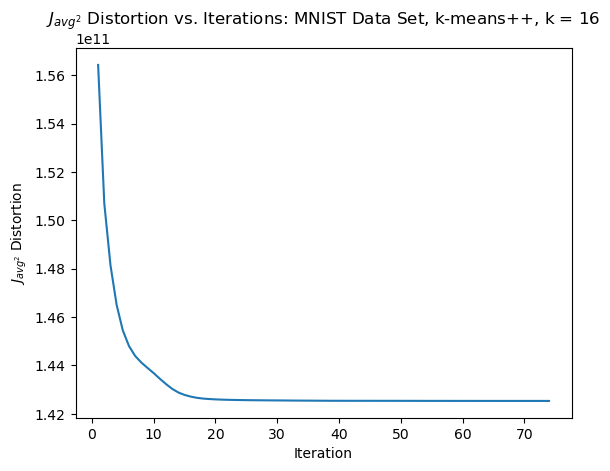

In [11]:
num_iter = len(Js)
Ts = np.arange(num_iter) + 1
fig, ax = plt.subplots()
ax.plot(Ts, Js)
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: MNIST Data Set, k-means++, k = 16")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

## k-means++: MNIST, k = 10

### Step 1: Create functions to calculate D and p

In [12]:
def D(imin1, xj, ms):
    minimum = np.Inf
    for p in range(imin1 + 1):
        dist = np.linalg.norm(xj - ms[imin1])
        if dist < minimum:
            minimum = dist
    return minimum




def p(i, xj, ms, N):
    num = D(i - 1, xj, ms)**2
    denom = 0.0
    for l in range(N):
        xl = x[l]
        cur_D = D(i - 1, xl, ms)**2
        denom = denom + cur_D
    return num / denom

### Step 2: Initalization

In [43]:
k = 10
N = 60000
#initialize gamma and m vectors
ms = np.ndarray((k, 784))
ms[0] = x[np.random.randint(0, N - 1)]
for i in range(1, k):
        p_mi = np.zeros(N)
        for j in range(N):
            xj = x[j]
            prob = p(i, xj, ms, N)
            p_mi[j] = prob
            # TODO: FIXME
            print(j)
            break
        
        m_index = np.random.choice(range(N), p=p_mi) 
        ms[i] = x[m_index]
    
        


0


ValueError: probabilities do not sum to 1